In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [60]:
train_set = pd.read_json('train.json')
train_set.drop(columns=['id'], inplace=True)
train_set.sample(5)

,cuisine,ingredients
14097,italian,"[ground black pepper, Italian parsley leaves, ..."
996,korean,"[water, medium-grain rice]"
24061,italian,"[water, white wine vinegar, toasted pine nuts,..."
36110,mexican,"[tomato sauce, kidney beans, sour cream, corn ..."
15609,japanese,"[fennel seeds, milk, all-purpose flour, water,..."


In [61]:
ing_col = train_set.ingredients.values
all_ings = np.concatenate(tuple(ing_col[i] for i in range(len(ing_col))))
unique_ings, counts = np.unique(all_ings, return_counts=True)
print('number of ingredients in dataset: ', len(all_ings))
print('unique number of ingredients in dataset: ', len(unique_ings))

number of ingredients in dataset:  428275
unique number of ingredients in dataset:  6714


In [63]:
ings=pd.DataFrame(all_ings, columns=["Ingredients"])
unique_in=ings.Ingredients.unique()

In [64]:
count_by_cuisine = train_set.groupby(['cuisine']).count()
count_by_cuisine

,ingredients
cuisine,
brazilian,467
british,804
cajun_creole,1546
chinese,2673
filipino,755
french,2646
greek,1175
indian,3003
irish,667


In [65]:
temp=pd.DataFrame(0, index= unique_in, columns= count_by_cuisine.index.values)
temp

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
romaine lettuce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
black olives,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
grape tomatoes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
garlic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pepper,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lipton® Iced Tea Brew Family Size Tea Bags,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
lop chong,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tomato garlic pasta sauce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
k=0
for i in range(len(train_set)):
    for j in range(len(train_set.ingredients[i])):
        temp[train_set["cuisine"][i]][train_set.ingredients[i][j]]=temp[train_set["cuisine"][i]][train_set.ingredients[i][j]]+1
temp

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
romaine lettuce,0,0,12,13,0,12,39,3,1,33,0,0,5,103,0,0,8,4,20,17
black olives,0,0,2,0,0,21,31,0,0,67,0,0,0,92,8,1,3,4,0,0
grape tomatoes,0,0,5,2,1,13,26,5,0,98,0,1,0,53,0,0,14,6,4,0
garlic,82,34,370,763,325,214,216,726,51,1471,139,166,303,1317,143,20,259,128,414,239
pepper,56,88,189,158,199,209,203,205,87,965,125,62,99,806,94,59,549,133,81,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lipton® Iced Tea Brew Family Size Tea Bags,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
lop chong,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tomato garlic pasta sauce,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [67]:
temp[temp.sum(axis=1) > 4]

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
romaine lettuce,0,0,12,13,0,12,39,3,1,33,0,0,5,103,0,0,8,4,20,17
black olives,0,0,2,0,0,21,31,0,0,67,0,0,0,92,8,1,3,4,0,0
grape tomatoes,0,0,5,2,1,13,26,5,0,98,0,1,0,53,0,0,14,6,4,0
garlic,82,34,370,763,325,214,216,726,51,1471,139,166,303,1317,143,20,259,128,414,239
pepper,56,88,189,158,199,209,203,205,87,965,125,62,99,806,94,59,549,133,81,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loin pork chops,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0
vanilla pudding,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0
sago,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
mission figs,0,0,0,0,0,2,0,1,0,1,0,0,0,0,1,0,0,1,0,0


In [68]:
for i in range(0, 1000):
    print('ingredients that are present in more than ', i, ' recipe(s): ', len(temp[temp.sum(axis=1) > i]))

ingredients that are present in more than  0  recipe(s):  6714
ingredients that are present in more than  1  recipe(s):  4955
ingredients that are present in more than  2  recipe(s):  4159
ingredients that are present in more than  3  recipe(s):  3675
ingredients that are present in more than  4  recipe(s):  3337
ingredients that are present in more than  5  recipe(s):  3062
ingredients that are present in more than  6  recipe(s):  2841
ingredients that are present in more than  7  recipe(s):  2669
ingredients that are present in more than  8  recipe(s):  2536
ingredients that are present in more than  9  recipe(s):  2400
ingredients that are present in more than  10  recipe(s):  2272
ingredients that are present in more than  11  recipe(s):  2179
ingredients that are present in more than  12  recipe(s):  2097
ingredients that are present in more than  13  recipe(s):  2032
ingredients that are present in more than  14  recipe(s):  1962
ingredients that are present in more than  15  rec

ingredients that are present in more than  279  recipe(s):  288
ingredients that are present in more than  280  recipe(s):  286
ingredients that are present in more than  281  recipe(s):  286
ingredients that are present in more than  282  recipe(s):  282
ingredients that are present in more than  283  recipe(s):  282
ingredients that are present in more than  284  recipe(s):  281
ingredients that are present in more than  285  recipe(s):  279
ingredients that are present in more than  286  recipe(s):  278
ingredients that are present in more than  287  recipe(s):  277
ingredients that are present in more than  288  recipe(s):  277
ingredients that are present in more than  289  recipe(s):  277
ingredients that are present in more than  290  recipe(s):  277
ingredients that are present in more than  291  recipe(s):  276
ingredients that are present in more than  292  recipe(s):  275
ingredients that are present in more than  293  recipe(s):  275
ingredients that are present in more tha

ingredients that are present in more than  598  recipe(s):  130
ingredients that are present in more than  599  recipe(s):  130
ingredients that are present in more than  600  recipe(s):  129
ingredients that are present in more than  601  recipe(s):  129
ingredients that are present in more than  602  recipe(s):  129
ingredients that are present in more than  603  recipe(s):  129
ingredients that are present in more than  604  recipe(s):  129
ingredients that are present in more than  605  recipe(s):  128
ingredients that are present in more than  606  recipe(s):  128
ingredients that are present in more than  607  recipe(s):  128
ingredients that are present in more than  608  recipe(s):  128
ingredients that are present in more than  609  recipe(s):  128
ingredients that are present in more than  610  recipe(s):  127
ingredients that are present in more than  611  recipe(s):  127
ingredients that are present in more than  612  recipe(s):  127
ingredients that are present in more tha

ingredients that are present in more than  920  recipe(s):  88
ingredients that are present in more than  921  recipe(s):  88
ingredients that are present in more than  922  recipe(s):  88
ingredients that are present in more than  923  recipe(s):  88
ingredients that are present in more than  924  recipe(s):  88
ingredients that are present in more than  925  recipe(s):  87
ingredients that are present in more than  926  recipe(s):  87
ingredients that are present in more than  927  recipe(s):  87
ingredients that are present in more than  928  recipe(s):  87
ingredients that are present in more than  929  recipe(s):  87
ingredients that are present in more than  930  recipe(s):  87
ingredients that are present in more than  931  recipe(s):  87
ingredients that are present in more than  932  recipe(s):  87
ingredients that are present in more than  933  recipe(s):  87
ingredients that are present in more than  934  recipe(s):  87
ingredients that are present in more than  935  recipe(

In [70]:
most_popular_ingredients = temp[temp.sum(axis=1) > 2000]
display(most_popular_ingredients)

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
garlic,82,34,370,763,325,214,216,726,51,1471,139,166,303,1317,143,20,259,128,414,239
pepper,56,88,189,158,199,209,203,205,87,965,125,62,99,806,94,59,549,133,81,71
salt,194,407,743,907,421,1203,572,1934,376,3454,332,422,253,2720,413,288,2290,460,396,264
tomatoes,63,8,115,22,54,129,156,521,7,601,37,36,1,871,74,22,115,151,52,23
ground black pepper,48,71,265,153,124,385,221,210,66,1444,89,72,92,577,147,53,465,149,50,104
eggs,52,191,87,288,93,185,80,81,90,627,41,144,105,326,33,112,622,88,106,37
milk,44,202,84,33,25,188,46,158,111,277,27,52,4,230,9,66,645,47,9,6
vegetable oil,43,58,245,602,95,102,29,593,43,253,96,245,120,775,40,69,451,46,335,145
soy sauce,1,2,12,1363,251,5,5,20,7,15,67,561,427,42,4,3,21,3,332,155
butter,48,222,334,43,60,514,90,273,219,1030,62,70,8,377,59,104,1255,45,24,11


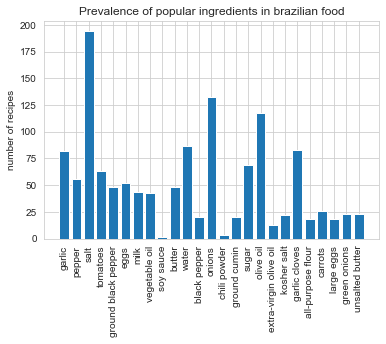

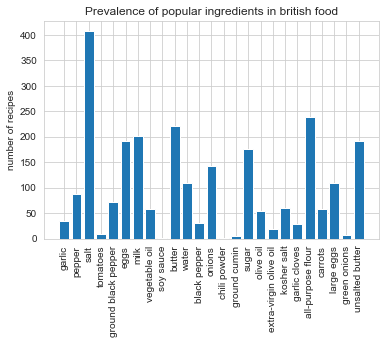

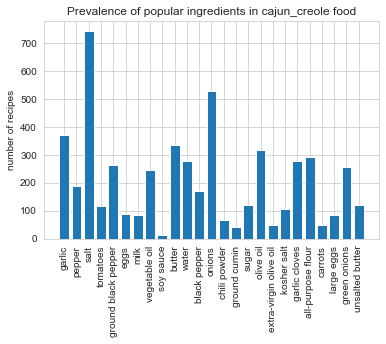

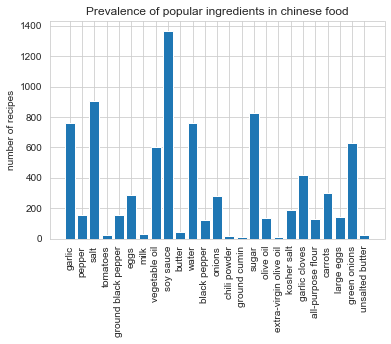

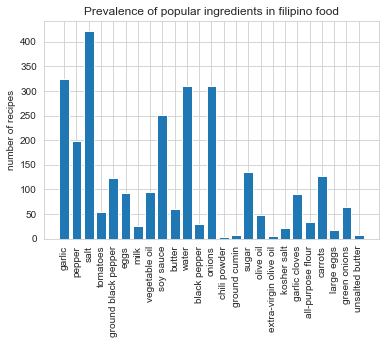

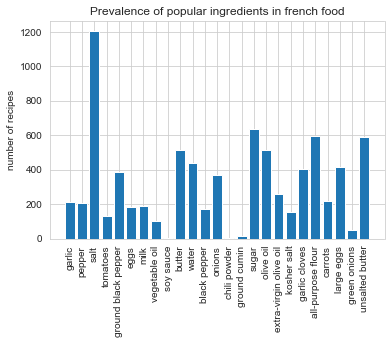

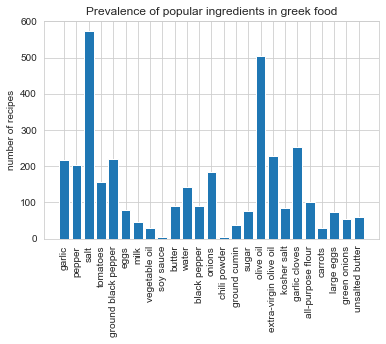

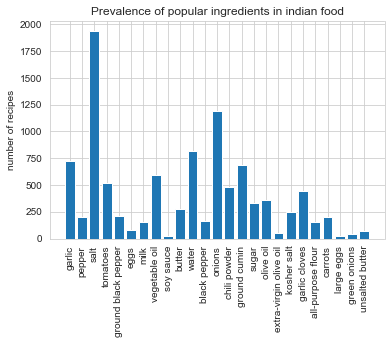

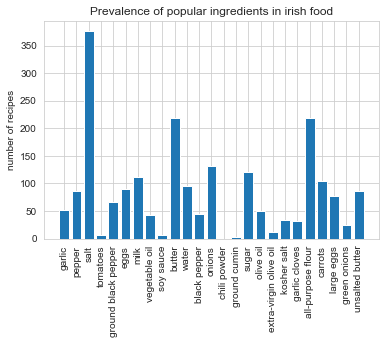

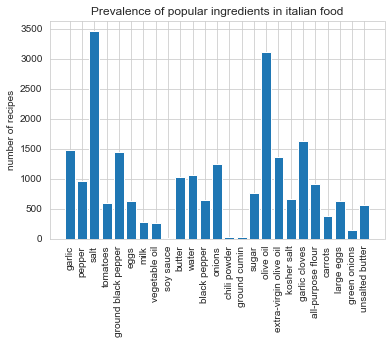

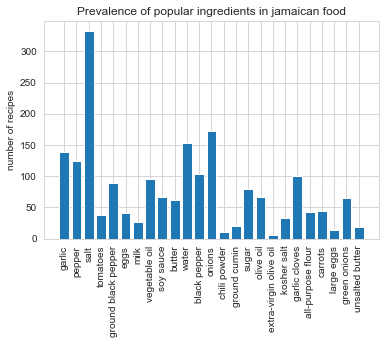

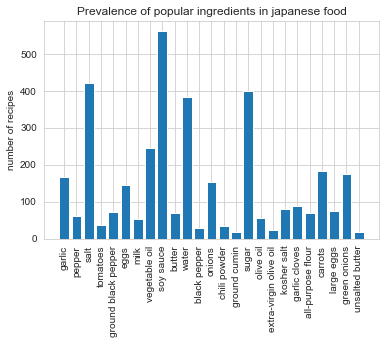

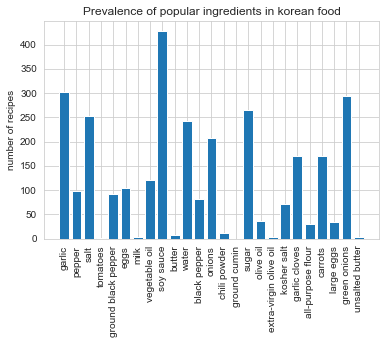

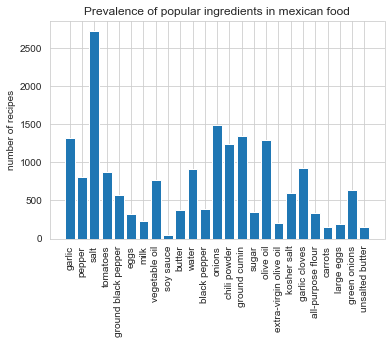

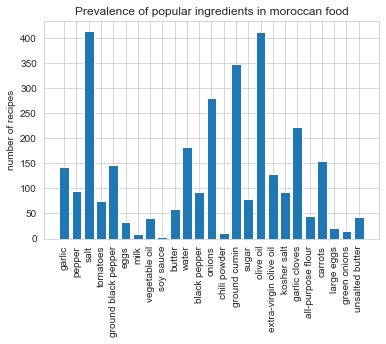

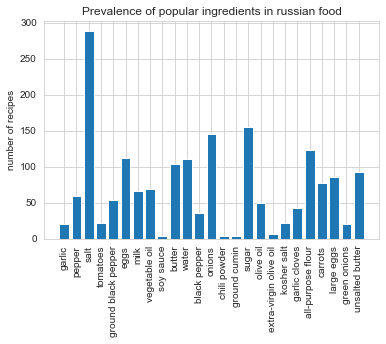

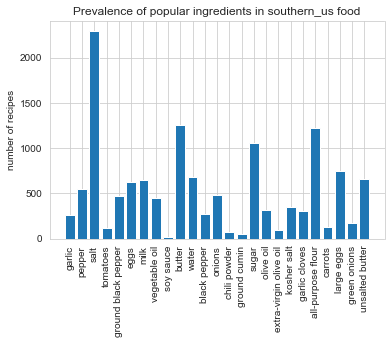

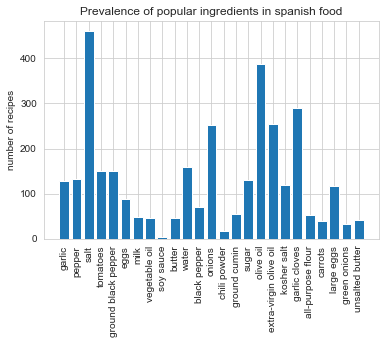

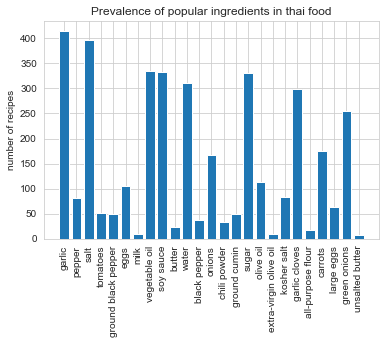

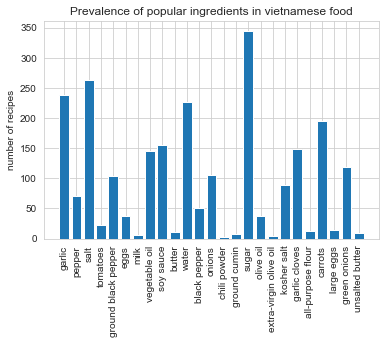

In [71]:
cuisines = count_by_cuisine.index.values
for cuisine in cuisines: 
    plt.figure()
    plt.title('Prevalence of popular ingredients in ' + cuisine + ' food')
    plt.bar(most_popular_ingredients.index.values, most_popular_ingredients[cuisine].values)
    plt.ylabel('number of recipes')
    plt.xticks(rotation='vertical')
    plt.show()

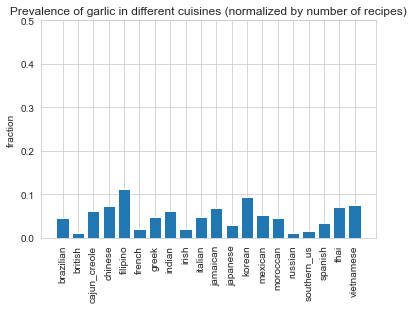

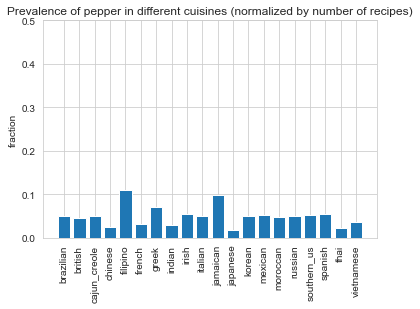

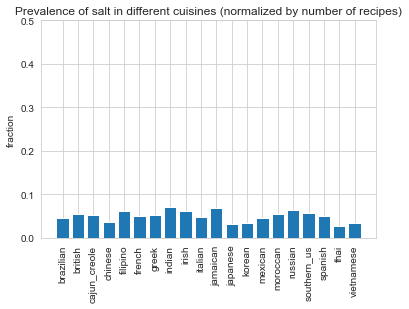

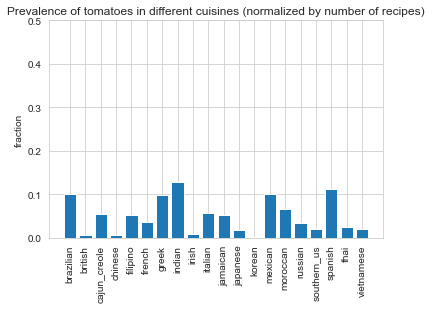

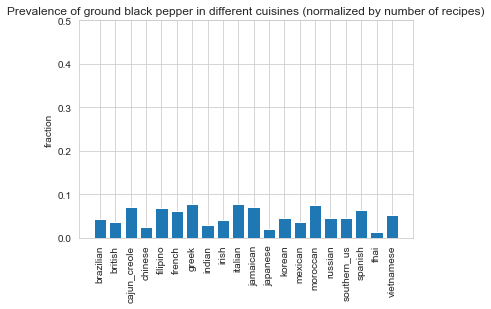

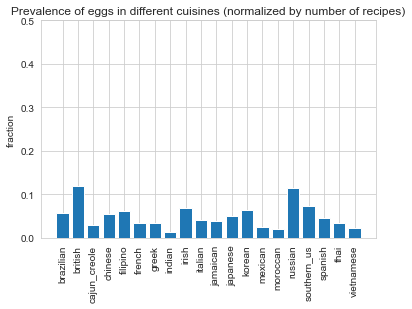

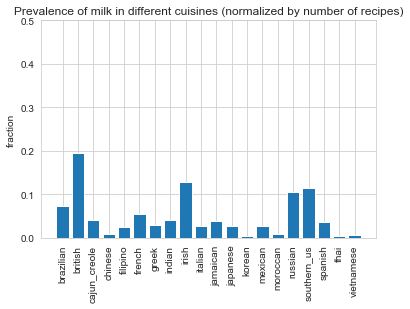

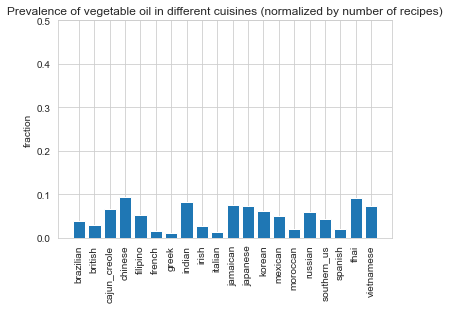

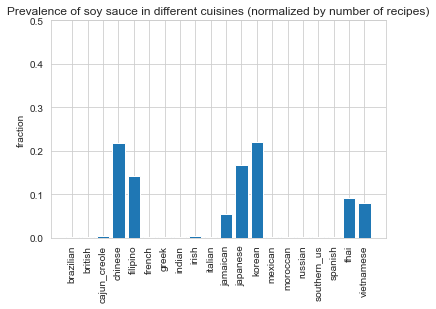

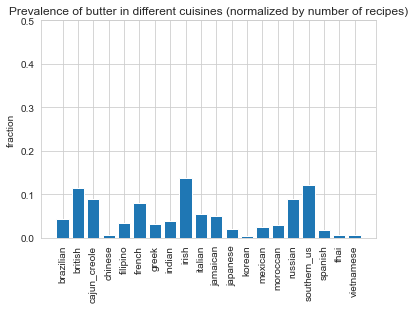

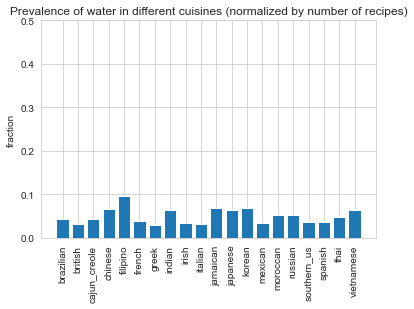

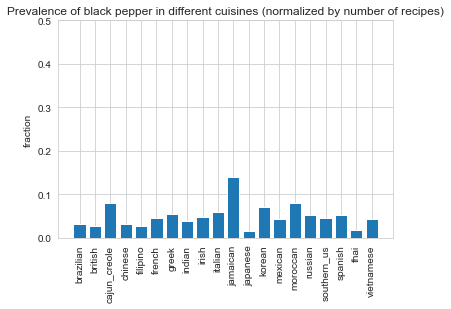

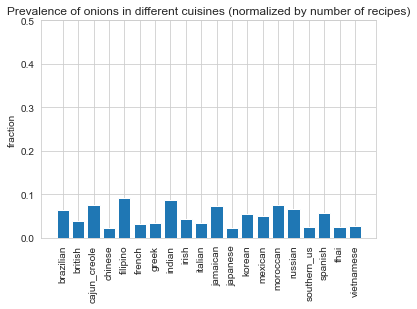

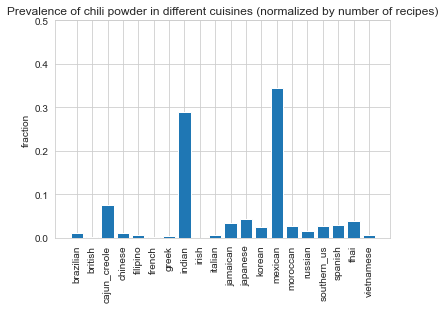

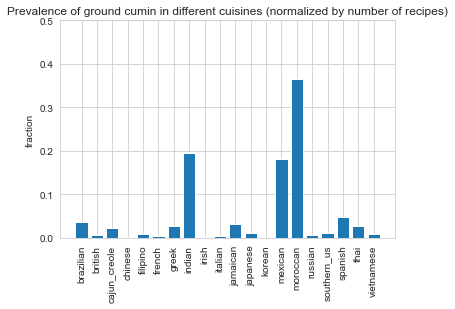

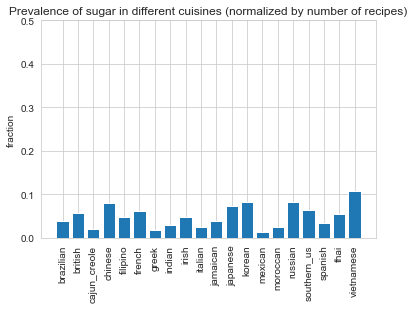

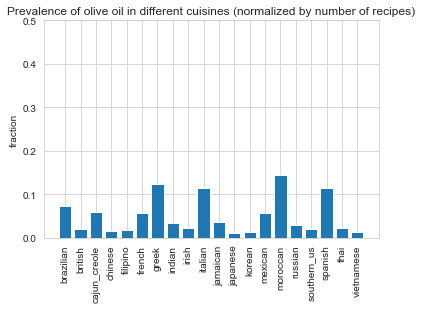

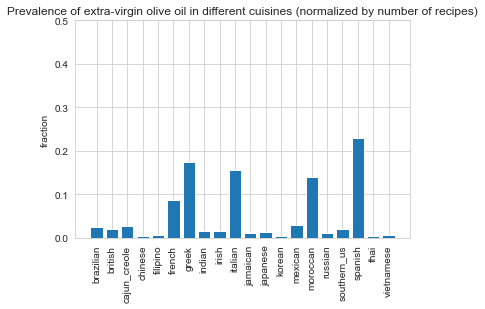

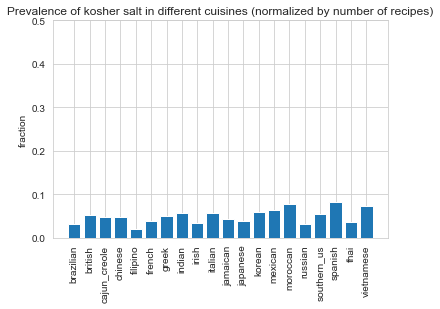

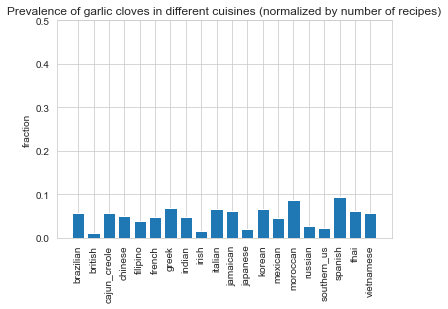

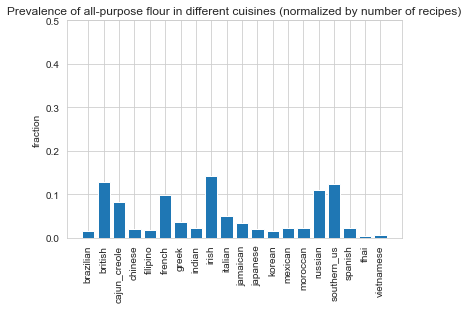

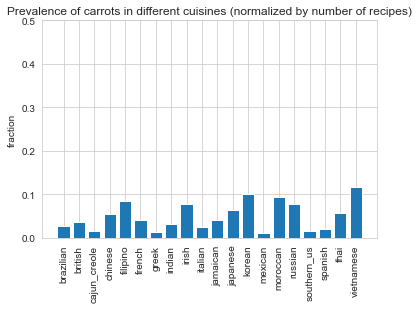

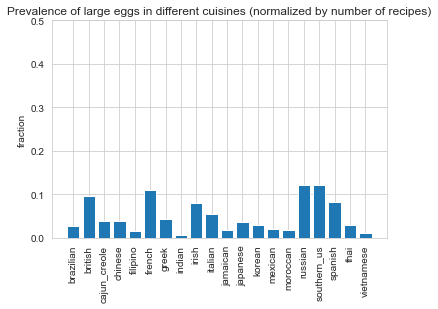

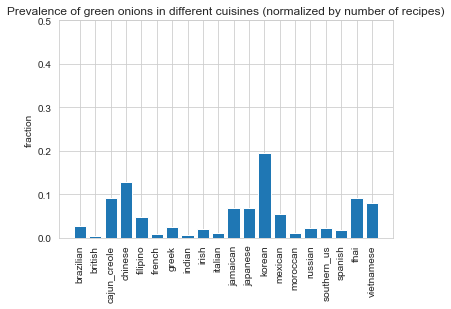

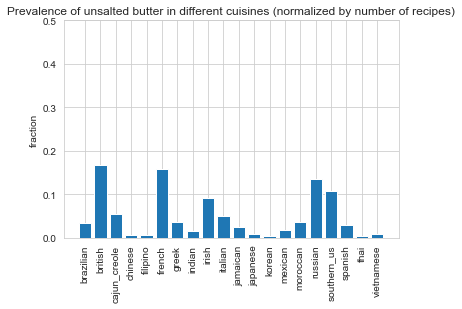

In [137]:
ingredients = most_popular_ingredients.index.values
for ingredient in ingredients: 
    plt.figure()
    plt.title('Prevalence of ' + ingredient + ' in different cuisines (normalized by number of recipes)')
    y = popular_ingredients.loc[[ingredient]].values.reshape(-1) / count_by_cuisine['ingredients'].values
    plt.bar(cuisines, y/np.sum(np.abs(y)))
    plt.ylabel('fraction')
    plt.ylim([0,0.5])
    plt.xticks(rotation='vertical')
    plt.show()

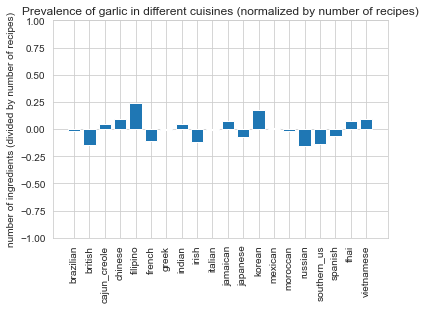

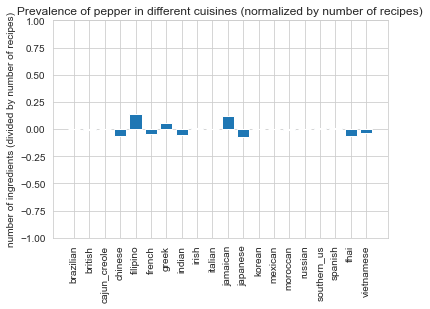

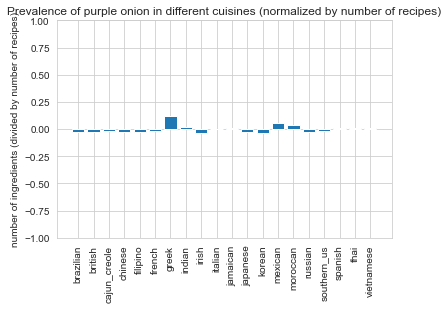

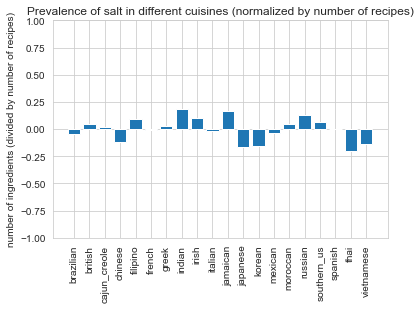

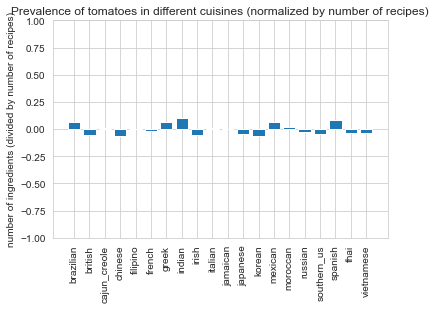

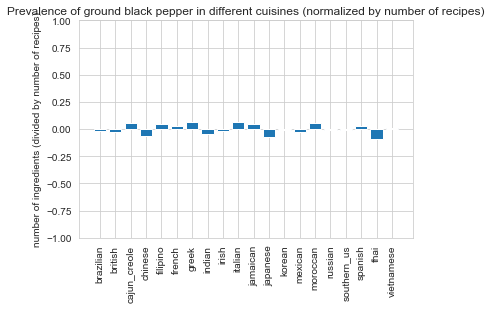

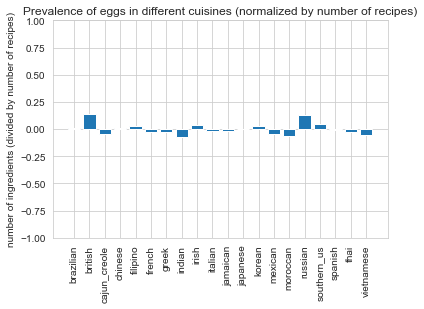

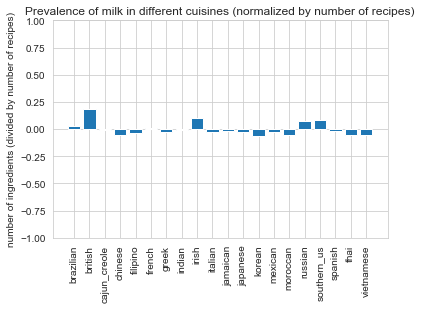

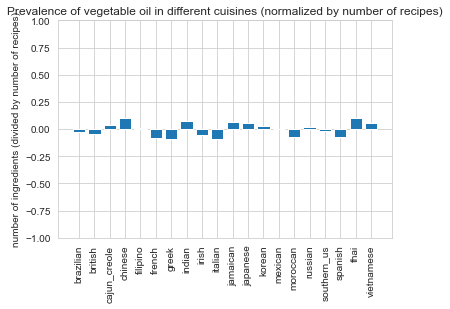

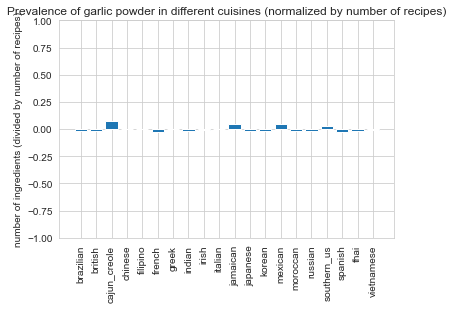

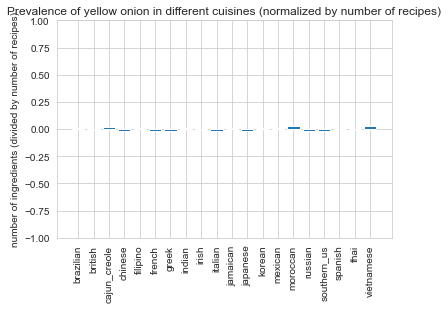

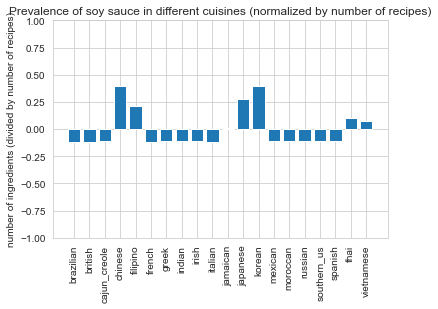

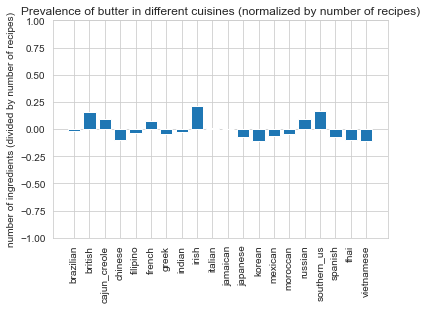

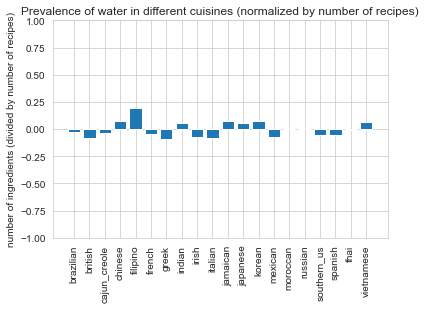

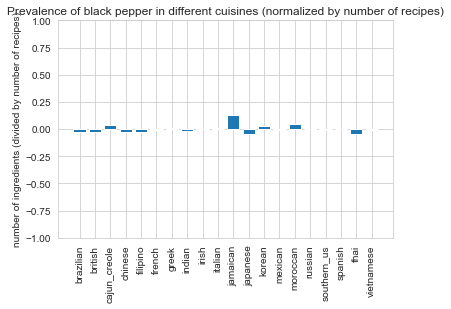

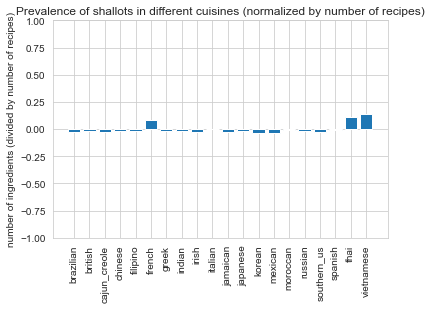

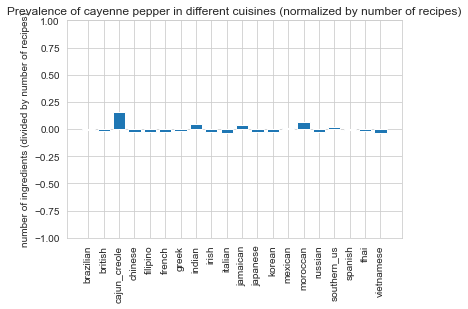

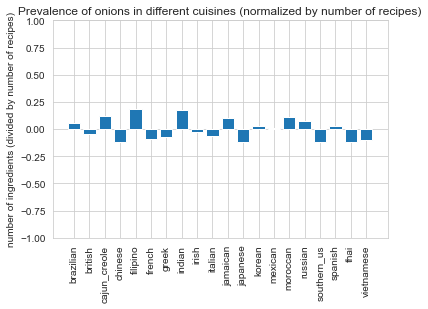

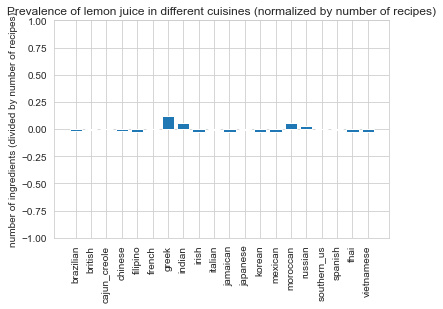

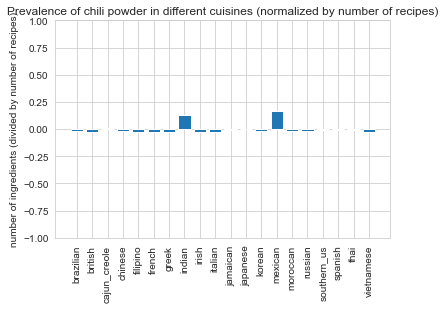

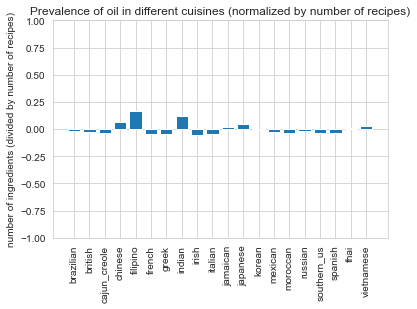

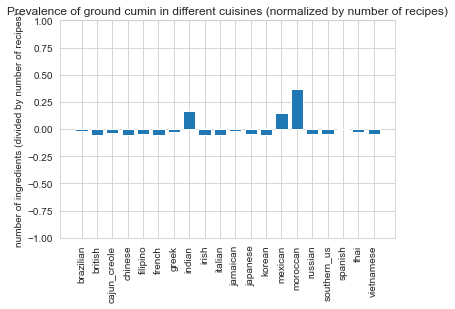

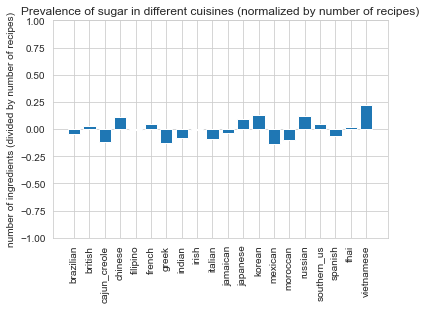

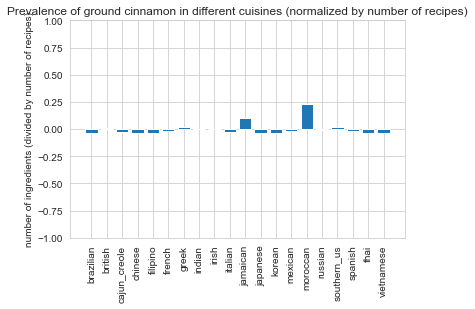

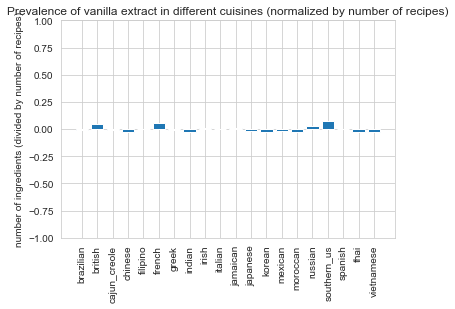

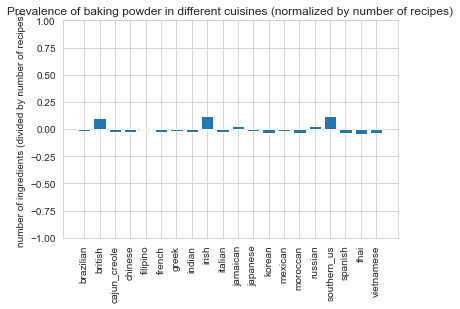

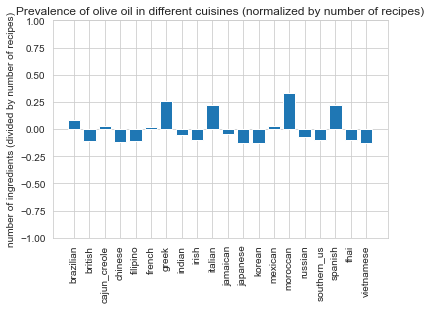

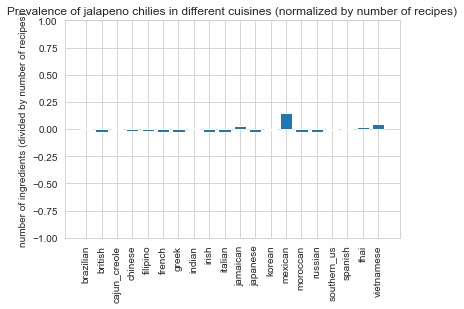

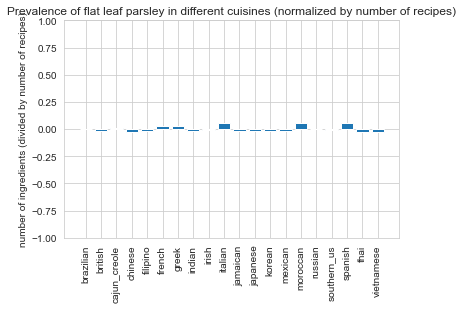

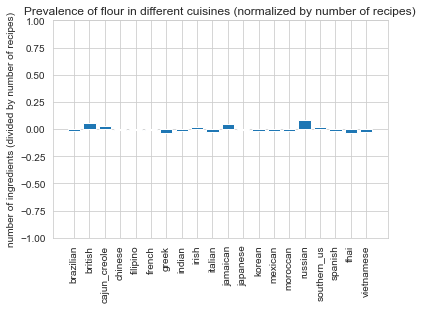

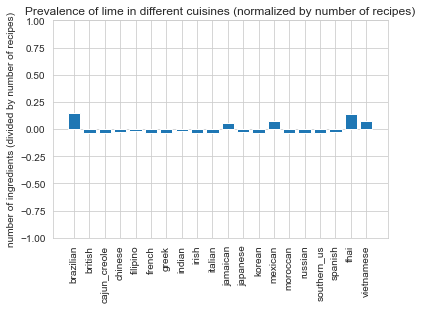

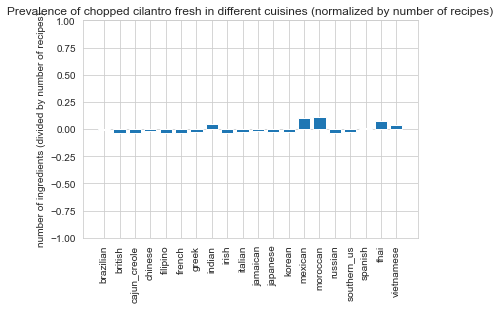

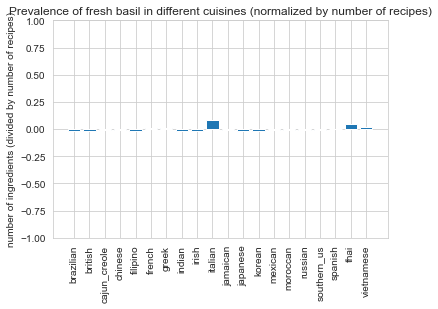

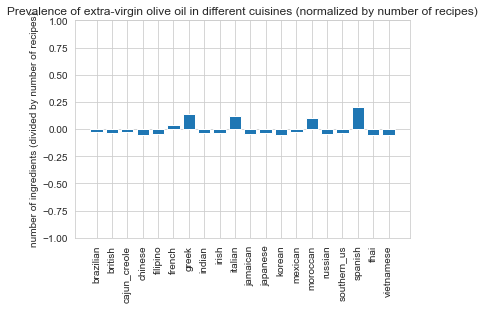

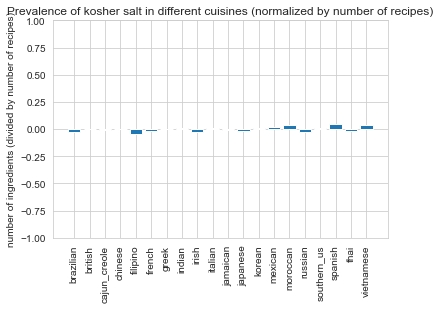

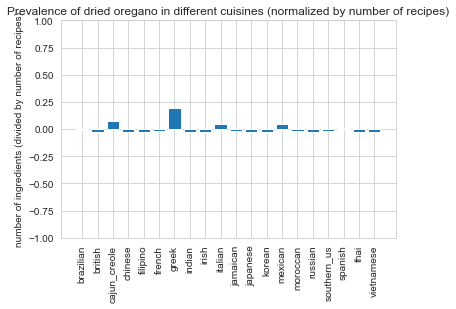

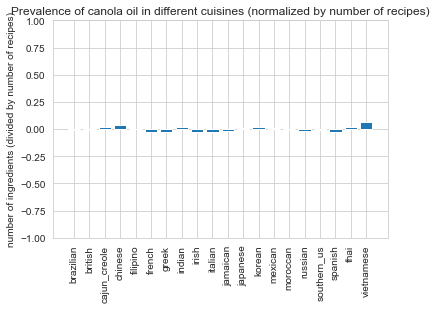

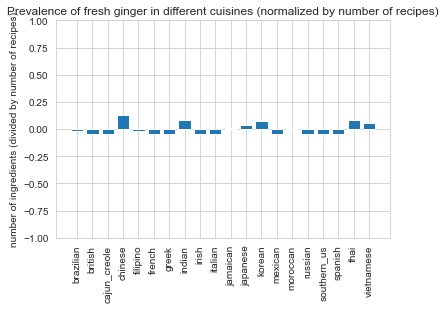

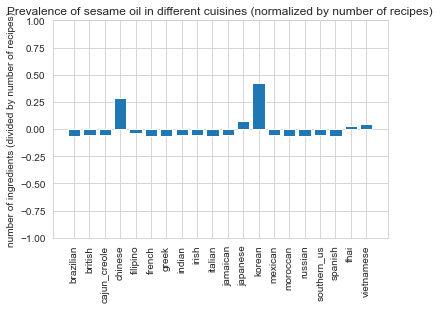

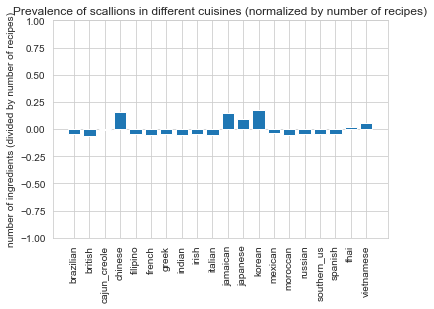

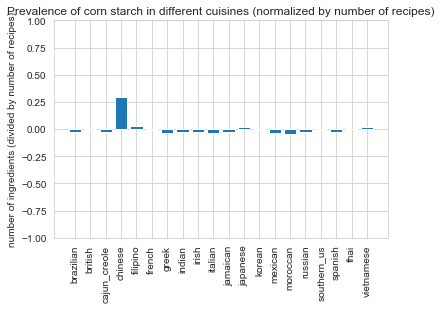

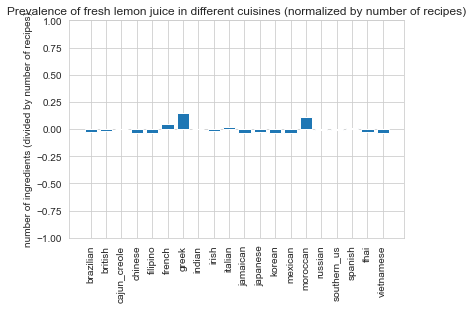

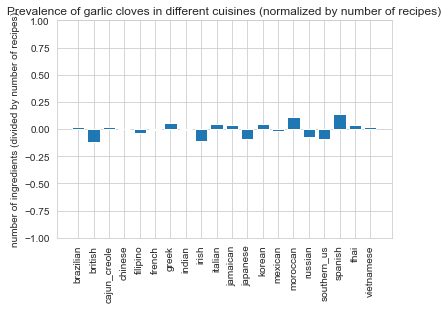

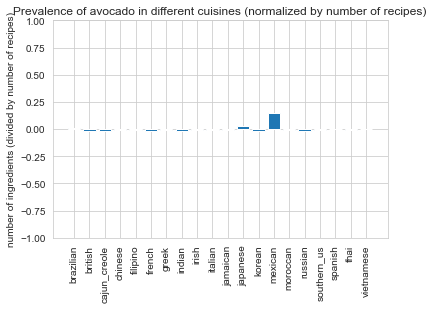

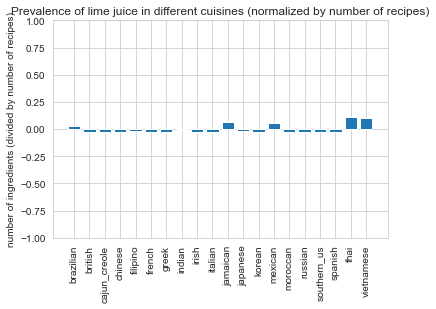

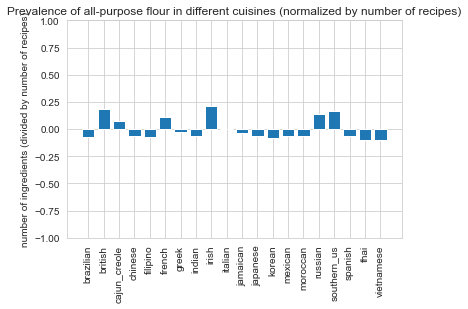

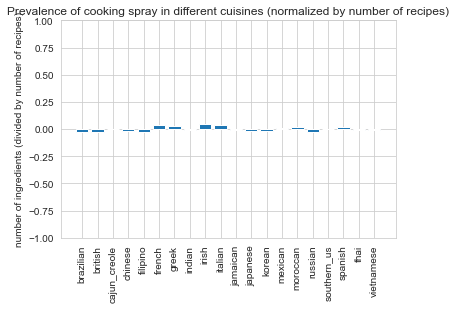

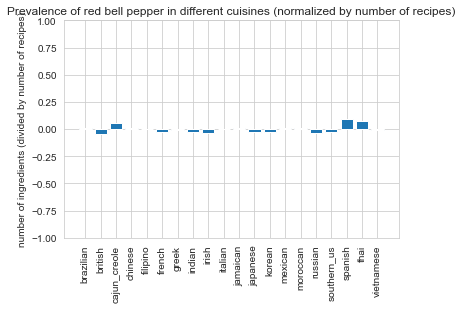

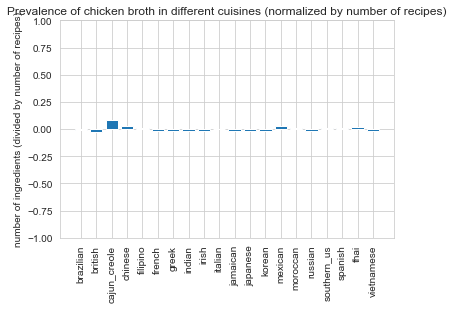

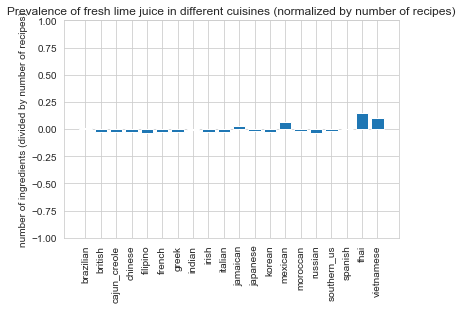

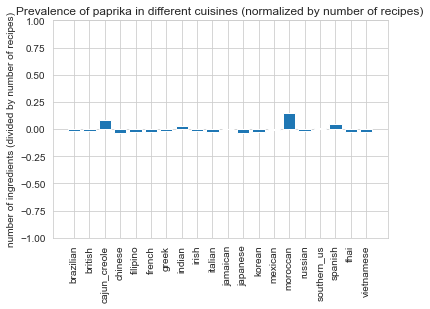

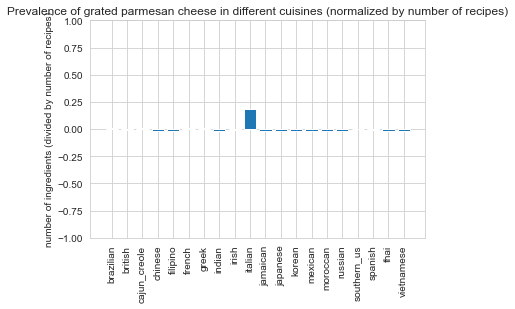

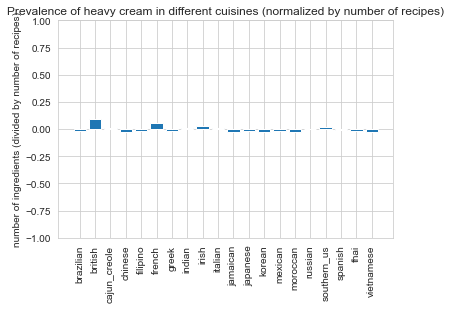

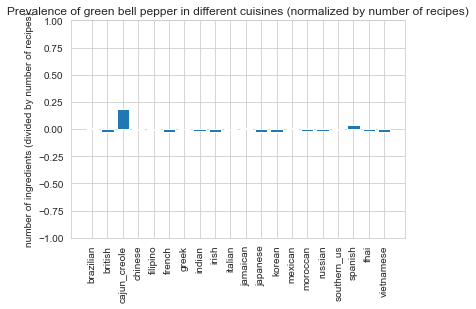

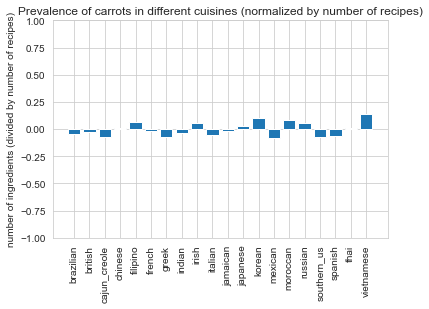

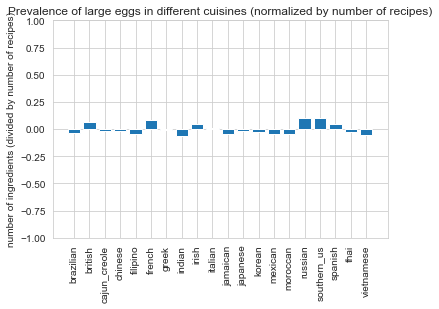

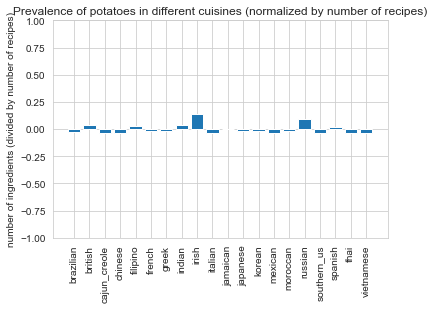

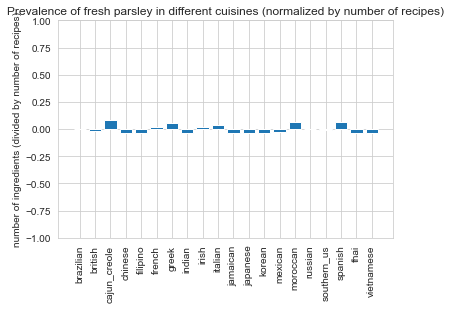

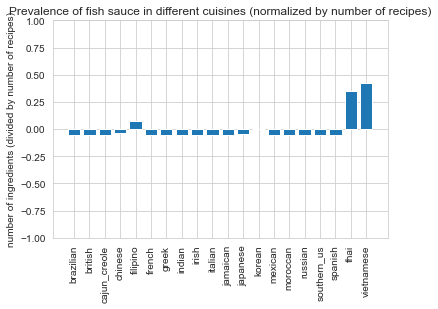

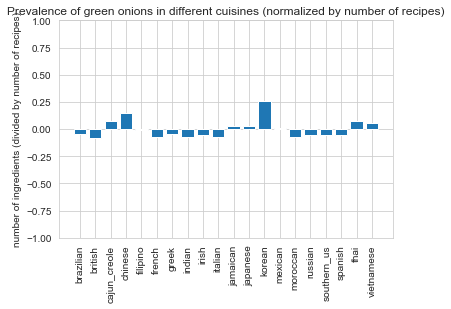

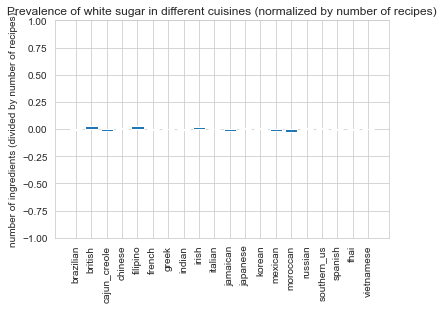

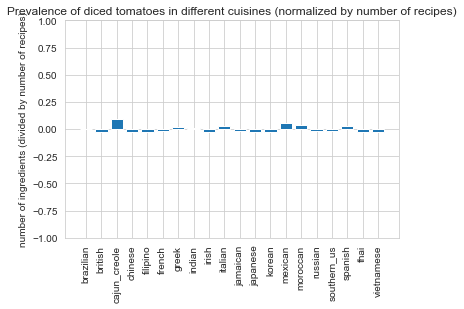

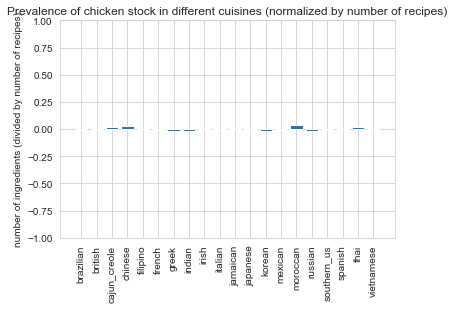

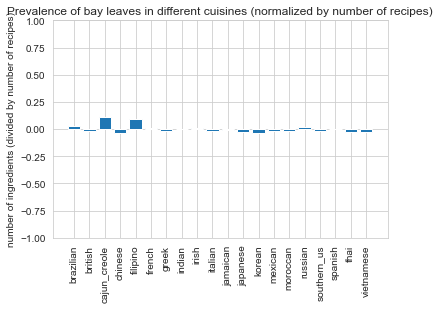

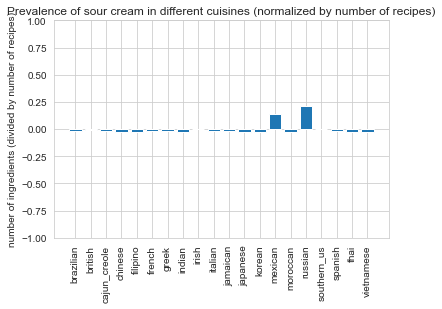

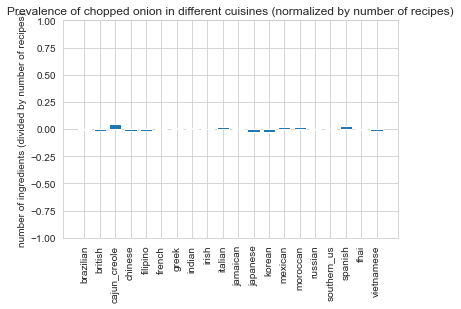

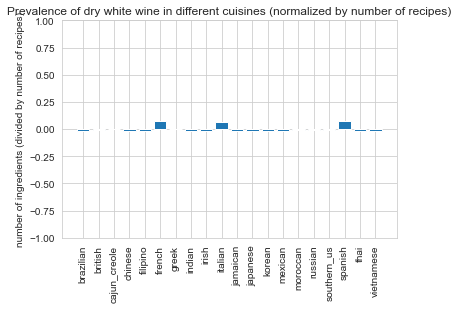

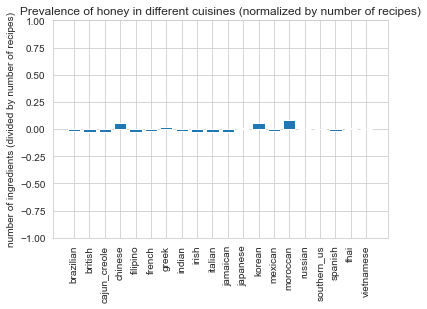

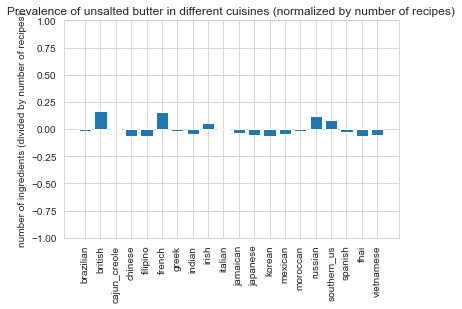

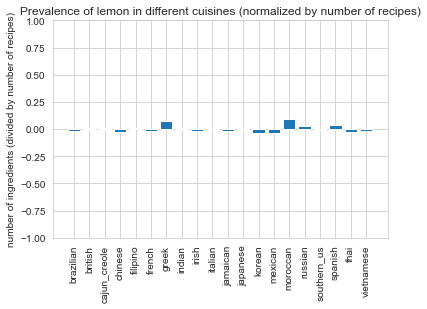

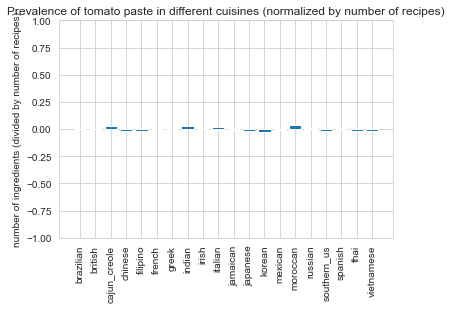

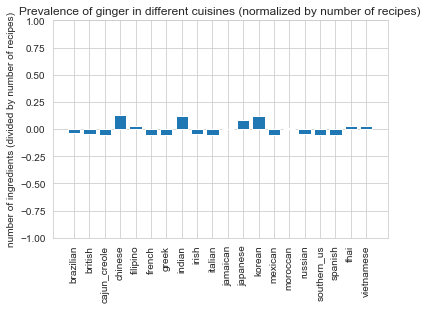

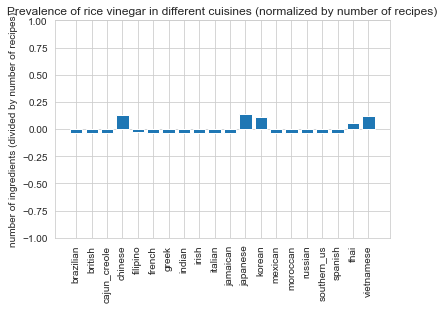

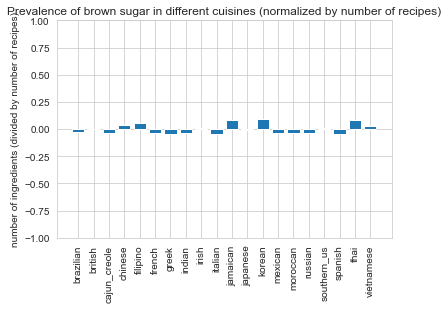

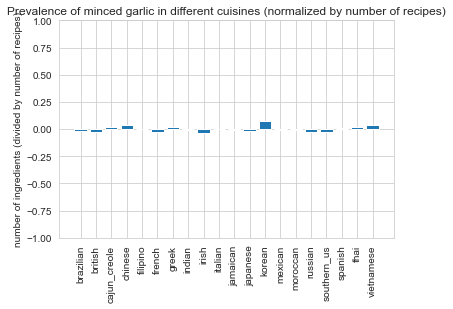

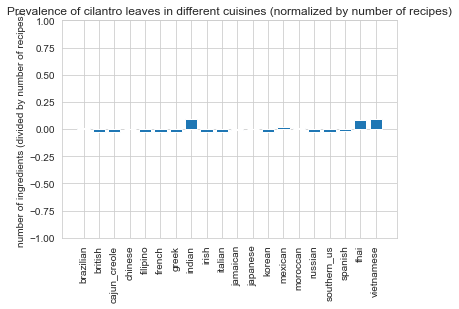

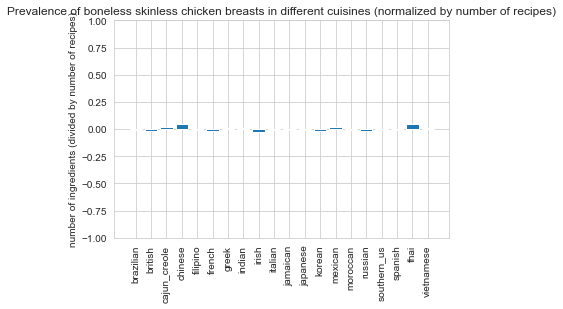

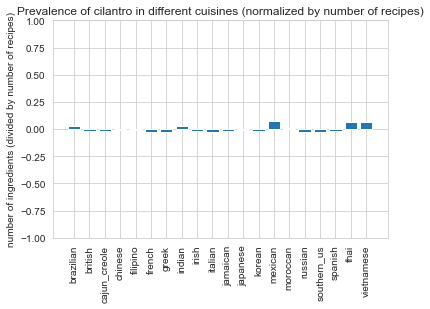

In [126]:
popular_ingredients = temp[temp.sum(axis=1) > 1000]
cuisines = count_by_cuisine.index.values
ingredients = popular_ingredients.index.values
difference_score = np.zeros(len(popular_ingredients))
max_residual = np.zeros(len(popular_ingredients))
variances = np.zeros(len(popular_ingredients))
stds = np.zeros(len(popular_ingredients))
i = 0
for ingredient in ingredients: 
    y = popular_ingredients.loc[[ingredient]].values.reshape(-1) / count_by_cuisine['ingredients'].values
    plt.figure()
    plt.title('Prevalence of ' + ingredient + ' in different cuisines (normalized by number of recipes)')  
    plt.bar(cuisines, y - np.mean(y))
    plt.ylabel('deviation from mean')
    plt.xticks(rotation='vertical')
    plt.ylim([-1,1])
    plt.show()
    difference_score[i] = np.sum(np.abs(y - np.mean(y)))/np.sum(np.abs(y))
    max_residual[i] = np.max(np.abs(y - np.mean(y)))/np.sum(np.abs(y))
    variances[i] = np.var(y)
    stds[i] = np.std(y) / np.sum(np.abs(y))
    i+=1

In [127]:
for i in range(len(popular_ingredients)):
    print('diff score for ', ingredients[i], ' is: ', difference_score[i])
    print('max score for ', ingredients[i], ' is: ', max_residual[i])
    print('variances for ', ingredients[i], ' is: ', variances[i])
    print('stds for ', ingredients[i], ' is: ', stds[i])

diff score for  garlic  is:  0.4426525492437166
max score for  garlic  is:  0.0615937777348819
variances for  garlic  is:  0.010987251556997117
stds for  garlic  is:  0.027173657952737646
diff score for  pepper  is:  0.2928385699406513
max score for  pepper  is:  0.05941480771685014
variances for  pepper  is:  0.0028692625277684483
stds for  pepper  is:  0.02223592087479028
diff score for  purple onion  is:  0.6832061677464996
max score for  purple onion  is:  0.14238947203950011
variances for  purple onion  is:  0.0013425765818723717
stds for  purple onion  is:  0.04453236490169719
diff score for  salt  is:  0.19387000524316447
max score for  salt  is:  0.022057663200440347
variances for  salt  is:  0.011999433159770182
stds for  salt  is:  0.011895604662139094
diff score for  tomatoes  is:  0.6484242723784243
max score for  tomatoes  is:  0.0785702050872892
variances for  tomatoes  is:  0.002702140803798097
stds for  tomatoes  is:  0.03852227554423055
diff score for  ground black pep

In [132]:
n = 30
best_diff = ingredients[np.argsort(difference_score)][-n:]
best_max = ingredients[np.argsort(max_residual)][-n:]
best_var = ingredients[np.argsort(variances)][-n:]
best_stds = ingredients[np.argsort(stds)][-n:]
print(n, ' best ingredients from diff score: ', best_diff)
print(n, ' best ingredients from max score: ', best_max)
print(n, ' best ingredients from var score: ', best_var)
print(n, ' best ingredients from std score: ', best_stds)
print('overlap of 4 metrics: ', set(best_diff).intersection(best_max).intersection(best_var).intersection(best_stds))

30  best ingredients from diff score:  ['paprika' 'baking powder' 'fresh parsley' 'heavy cream' 'diced tomatoes'
 'jalapeno chilies' 'ground cinnamon' 'flat leaf parsley' 'ginger'
 'scallions' 'dry white wine' 'fresh ginger' 'fresh basil' 'cilantro'
 'extra-virgin olive oil' 'cilantro leaves' 'fresh lime juice'
 'chopped cilantro fresh' 'chili powder' 'grated parmesan cheese'
 'ground cumin' 'avocado' 'sour cream' 'lime' 'soy sauce' 'lime juice'
 'dried oregano' 'rice vinegar' 'sesame oil' 'fish sauce']
30  best ingredients from max score:  ['lemon juice' 'bay leaves' 'cilantro leaves' 'potatoes'
 'chopped cilantro fresh' 'soy sauce' 'heavy cream' 'fresh lemon juice'
 'shallots' 'rice vinegar' 'extra-virgin olive oil' 'dry white wine'
 'lime' 'cayenne pepper' 'paprika' 'lime juice' 'fresh lime juice'
 'jalapeno chilies' 'fresh basil' 'ground cinnamon' 'chili powder'
 'green bell pepper' 'ground cumin' 'dried oregano' 'corn starch'
 'sesame oil' 'sour cream' 'fish sauce' 'avocado' 'grat